In [2]:
#copying the file
!cp '/content/drive/MyDrive/rsna-pneumonia-detection-challenge.zip' 'rsna-pneumonia-detection-challenge.zip'

^C


In [3]:
#unzipping the file
!unzip 'rsna-pneumonia-detection-challenge.zip'

Archive:  rsna-pneumonia-detection-challenge.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of rsna-pneumonia-detection-challenge.zip or
        rsna-pneumonia-detection-challenge.zip.zip, and cannot find rsna-pneumonia-detection-challenge.zip.ZIP, period.


In [4]:
#for data manipulation
import pandas as pd

In [5]:
#training data
train = pd.read_csv('stage_2_train_labels.csv')

In [6]:
train.head()

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1


In [7]:
class_details = pd.read_csv('stage_2_detailed_class_info.csv')

In [8]:
class_details.head()

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity


In [9]:
#for plotting and numerical extensions
import matplotlib.pyplot as plt

In [10]:
#merging the two dataframes
train = pd.concat([train,class_details["class"]],axis=1,sort=False)

train = train.drop_duplicates()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30227 entries, 0 to 30226
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
 6   class      30227 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.8+ MB


In [11]:
train.head()

,patientId,x,y,width,height,Target,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1,Lung Opacity


In [12]:
#checking number of rows and columns 
train.shape

(30227, 7)

In [13]:
#checking for null values
train.isna().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
class            0
dtype: int64

In [14]:
#as the null values are of float type and cannot drop the null value rows as the datas are needed, null values are filled with 0.0 
train = train.fillna('0.0')

In [15]:
#double-checking null values
train.isna().sum()

patientId    0
x            0
y            0
width        0
height       0
Target       0
class        0
dtype: int64

In [16]:
#checking the target column
train.groupby('Target').size()

Target
0    20672
1     9555
dtype: int64

<Axes: xlabel='Target'>

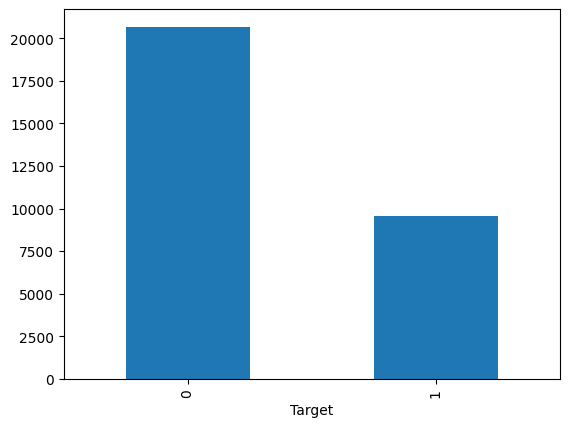

In [17]:
#bar plot
train.groupby('Target').size().plot.bar()

In [18]:
#checking the class column
train.groupby('class').size()

class
Lung Opacity                     9555
No Lung Opacity / Not Normal    11821
Normal                           8851
dtype: int64

<Axes: ylabel='class'>

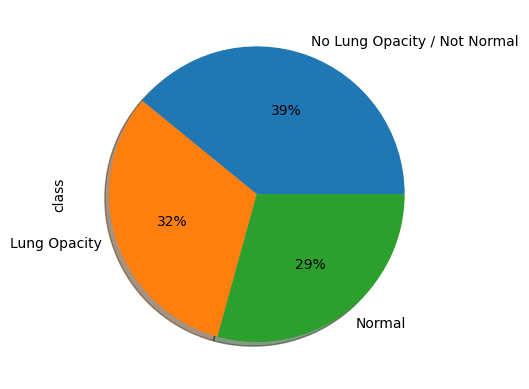

In [19]:
#pie chart
train["class"].value_counts().plot(kind='pie',autopct='%1.0f%%', shadow=True, subplots=False)

<Axes: xlabel='class', ylabel='count'>

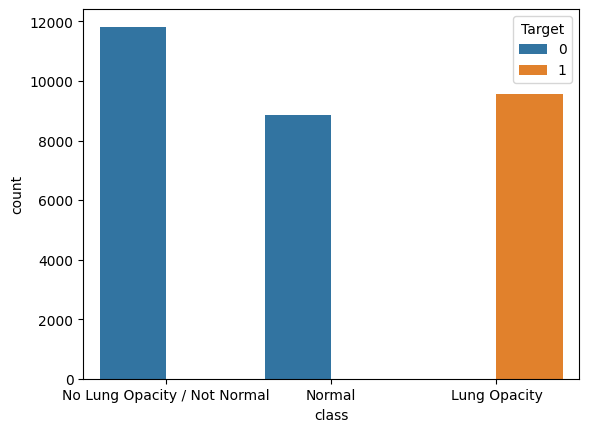

In [20]:
#Countplot
import seaborn as sns
sns.countplot(x = 'class', hue = 'Target', data = train)

In [21]:
pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
import pydicom

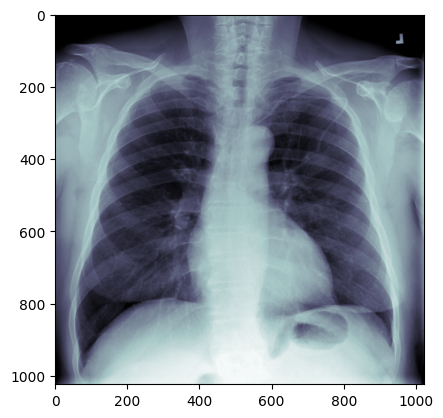

In [23]:
#displaying an image
ds = pydicom.dcmread('/content/stage_2_train_images/ff1bc114-1975-4f8f-9015-54f0d90eb445.dcm')
  
plt.imshow(ds.pixel_array, cmap=plt.cm.bone)  # set the color map to bone
plt.show()

In [24]:
#checking the datatypes
train.dtypes

patientId    object
x            object
y            object
width        object
height       object
Target        int64
class        object
dtype: object

In [25]:
#as the columns x,y,width,height need to be converted to float type 

In [26]:
train.columns

Index(['patientId', 'x', 'y', 'width', 'height', 'Target', 'class'], dtype='object')

In [27]:
col = ['x', 'y', 'width', 'height']

In [28]:
for i in col:
  train[i] = train[i].astype(float)

In [29]:
#checking the correlation
train.corr()

,x,y,width,height,Target
x,1.000000,0.762055,0.795007,0.735061,0.846951
y,0.762055,1.000000,0.811707,0.634177,0.897660
width,0.795007,0.811707,1.000000,0.915537,0.950152
height,0.735061,0.634177,0.915537,1.000000,0.865294
Target,0.846951,0.897660,0.950152,0.865294,1.000000


In [30]:
#dropping the target column
train = train.drop('Target',axis =1)

In [31]:
#preprocessing the image

In [32]:
import cv2
import pydicom as dcm
import numpy as np

In [33]:
images = []
ADJUSTED_IMAGE_SIZE = 128
imageList = []
classLabels = []
labels = []
originalImage = []

def readAndReshapeImage(image):
    img = np.array(image).astype(np.uint8)
    res = cv2.resize(img,(ADJUSTED_IMAGE_SIZE,ADJUSTED_IMAGE_SIZE), interpolation = cv2.INTER_LINEAR)
    return res

def populateImage(rowData):
    for index, row in rowData.iterrows():
        patientId = row.patientId
        classlabel = row["class"]
        dcm_file = '/content/stage_2_train_images/'+'{}.dcm'.format(patientId)
        dcm_data = dcm.read_file(dcm_file)
        img = dcm_data.pixel_array
        
        ## Converting the image to 3 channels as the dicom image pixel does not have colour classes wiht it
        if len(img.shape) != 3 or img.shape[2] != 3:
            img = np.stack((img,) * 3, -1)
        
        imageList.append(readAndReshapeImage(img))
#         originalImage.append(img)
        classLabels.append(classlabel)
    tmpImages = np.array(imageList)
    tmpLabels = np.array(classLabels)
#     originalImages = np.array(originalImage)
    return tmpImages,tmpLabels

images, labels = populateImage(train)
print(images.shape , labels.shape)

(30227, 128, 128, 3) (30227,)


In [34]:
from sklearn.preprocessing import LabelBinarizer
encode = LabelBinarizer()
y = encode.fit_transform(labels)

## splitting into train ,test and validation data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3, random_state=50)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=50)

In [35]:
from tensorflow.keras.layers import Layer, Convolution2D, Flatten, Dense
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.layers import Dense, Activation,Flatten,Dropout,MaxPooling2D,BatchNormalization

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import losses,optimizers

In [36]:
def cnn_model(height, width, num_channels, num_classes, loss='categorical_crossentropy', metrics=['accuracy']):
  batch_size = None

  model = Sequential()

  model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                  activation ='relu', batch_input_shape = (batch_size,height, width, num_channels)))


  model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                  activation ='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.2))


  model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                  activation ='relu'))
  model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                  activation ='relu'))
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  model.add(Dropout(0.3))

  model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                  activation ='relu'))
  model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                  activation ='relu'))
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  model.add(Dropout(0.4))

  model.add(GlobalMaxPooling2D())
  model.add(Dense(256, activation = "relu"))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation = "softmax"))

  optimizer = Adam(lr=0.001)
  model.compile(optimizer = optimizer, loss = loss, metrics = metrics)
  model.summary()
  return model

In [37]:
#Model Summary
cnn = cnn_model(ADJUSTED_IMAGE_SIZE,ADJUSTED_IMAGE_SIZE,3,3)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                        

In [38]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=4),
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
]

In [39]:
model_fit = cnn.fit(X_train, 
                  y_train, 
                  epochs = 10, 
                  validation_data = (X_val,y_val),
                  batch_size = 100,
                 callbacks = callbacks)

Epoch 1/10
212/212 [==============================] - 55s 171ms/step - loss: 1.4316 - accuracy: 0.4059 - val_loss: 1.0272 - val_accuracy: 0.4633 - lr: 0.0010
Epoch 2/10
212/212 [==============================] - 34s 160ms/step - loss: 1.0066 - accuracy: 0.4587 - val_loss: 1.0145 - val_accuracy: 0.4860 - lr: 0.0010
Epoch 3/10
212/212 [==============================] - 35s 167ms/step - loss: 0.9851 - accuracy: 0.4892 - val_loss: 1.0196 - val_accuracy: 0.4386 - lr: 0.0010
Epoch 4/10
212/212 [==============================] - 34s 158ms/step - loss: 0.9849 - accuracy: 0.4804 - val_loss: 0.9936 - val_accuracy: 0.4818 - lr: 0.0010
Epoch 5/10
212/212 [==============================] - 35s 163ms/step - loss: 0.9713 - accuracy: 0.4996 - val_loss: 0.9870 - val_accuracy: 0.5065 - lr: 0.0010
Epoch 6/10
212/212 [==============================] - 35s 165ms/step - loss: 0.9683 - accuracy: 0.5012 - val_loss: 0.9737 - val_accuracy: 0.5065 - lr: 0.0010
Epoch 7/10
212/212 [==============================] 

In [40]:
loss, accuracy = cnn.evaluate(X_test, y_test, verbose=1)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

142/142 [==============================] - 3s 15ms/step - loss: 0.8873 - accuracy: 0.5887
Test loss: 0.887324869632721
Test accuracy: 0.5886634588241577


In [41]:
def createResultDf(name,accuracy,testscore):
    result = pd.DataFrame({'Method':[name], 'accuracy': [accuracy] ,'Test Score':[testscore]})
    return result

In [45]:
acc = model_fit.history['accuracy']
resultDF = createResultDf("CNN",acc[-1],accuracy)

In [46]:
resultDF

,Method,accuracy,Test Score
0,CNN,0.571226,0.588663


In [47]:
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, roc_auc_score,classification_report
from sklearn.metrics import classification_report

Y_pred = cnn.predict(X_test)

Y_truepred = np.argmax(y_test,axis = 1) 

Y_testPred = cnn.predict(X_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

reportData = classification_report(Y_truepred, Y_pred_classes,output_dict=True)

for data in reportData:
    if(data == '-1' or data == '1'):
        if(type(reportData[data]) is dict):
            for subData in reportData[data]:
                resultDF[data+"_"+subData] = reportData[data][subData]

resultDF

142/142 [==============================] - 1s 9ms/step


,Method,accuracy,Test Score,1_precision,1_recall,1_f1-score,1_support
0,CNN,0.571226,0.588663,0.49036,0.674352,0.567823,1735


In [48]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test, Y_pred)

0.6280404093853095